# Image Processing Homework 4

For this homework, I used the 28x28 MNIST digit dataset that is included in the tensorflow example. It gets 100 digits randomly from that dataset, extracts their HOG features and trains a SVM classifier with these features.



In [7]:
# Import tensorflow
import tensorflow as tf
# Import tensorflow's MNIST data handle
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


I hope you don't hate me that above commands downloaded MNIST data set to your loacl disk space :)
Below you see how to fetch arbitrary number of MNIST image data and their _labels_, a correct digit in each image.

In [0]:
#randomly gets 100 images to train svm
image_count = 100
data = mnist.train.next_batch(image_count)

The fetched data is a python list of 2 elemnts: data and label. Let's loop over them and visualize.

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


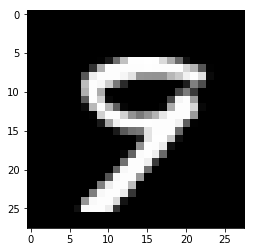

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


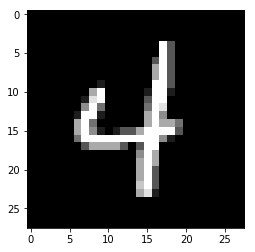

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


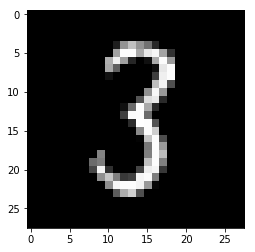

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


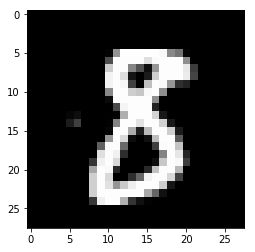

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


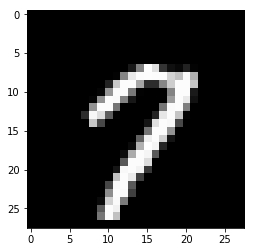

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


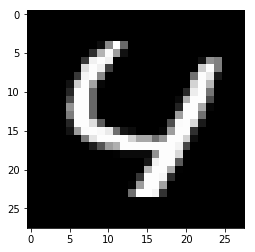

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


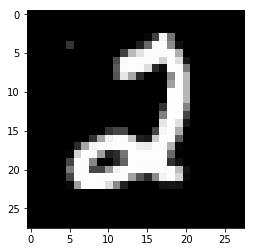

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


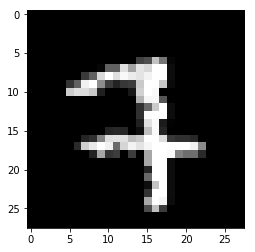

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


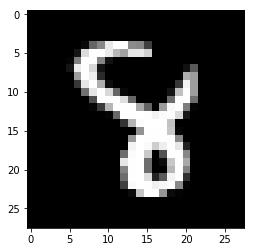

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


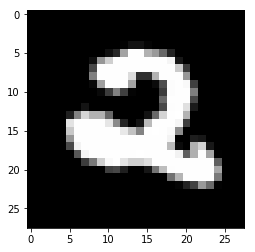

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


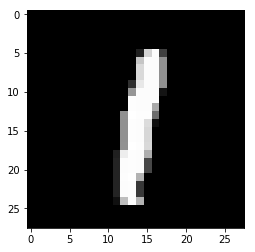

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


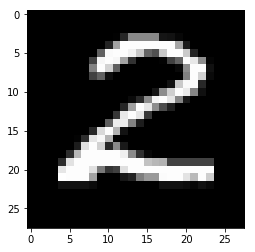

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


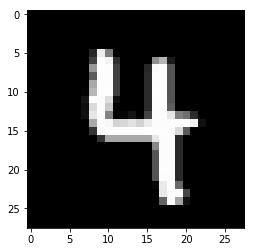

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


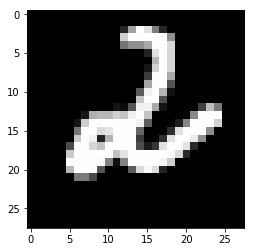

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


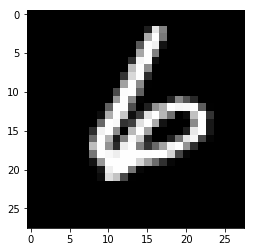

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


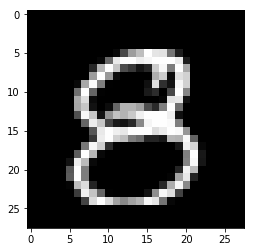

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


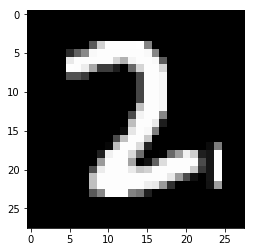

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


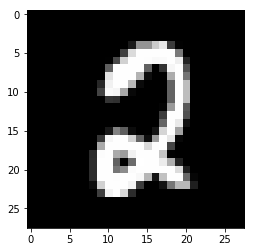

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


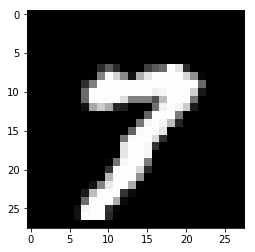

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


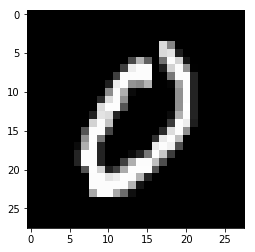

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


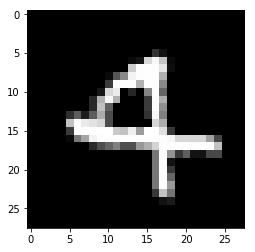

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


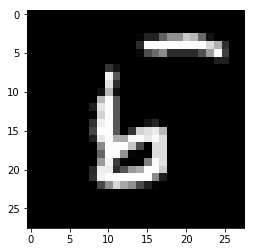

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


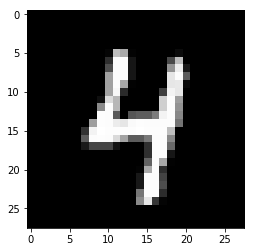

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


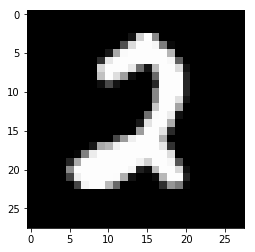

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


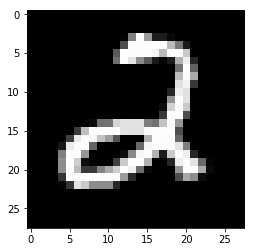

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


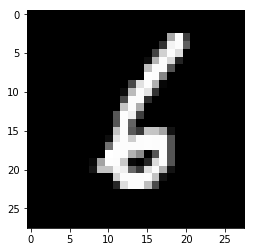

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


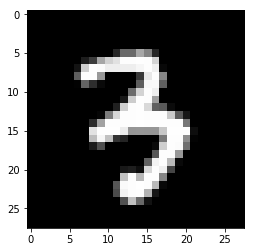

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


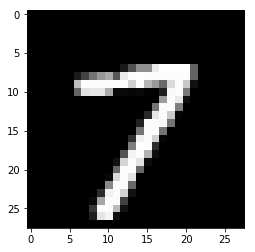

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


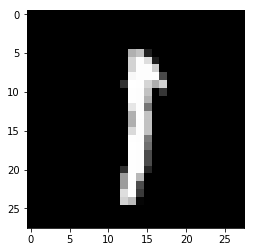

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


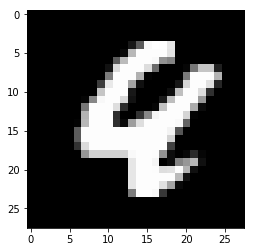

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


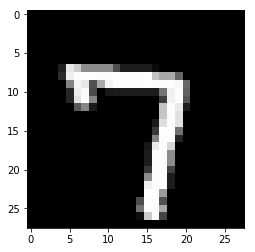

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


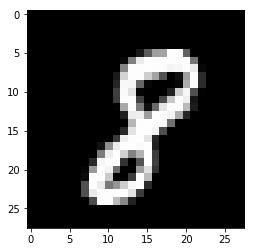

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


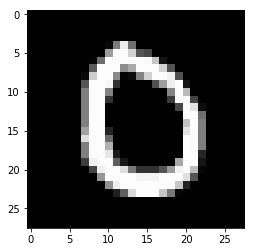

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


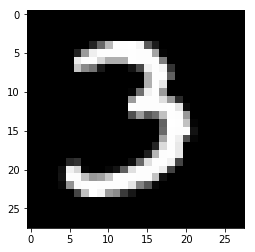

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


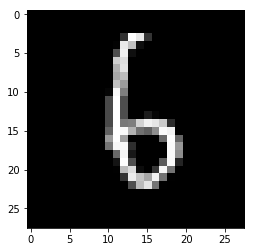

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


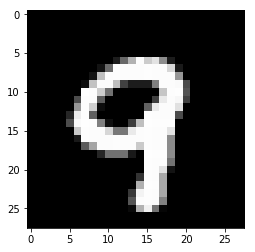

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


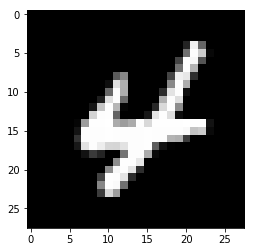

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


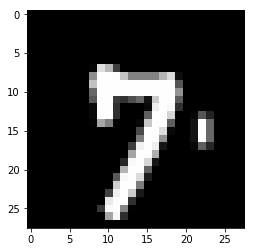

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


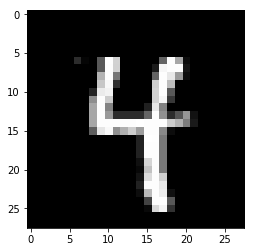

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


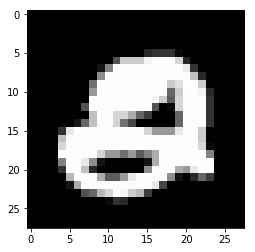

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


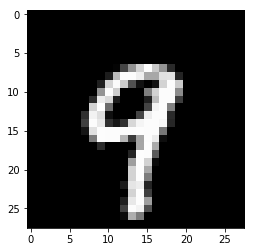

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


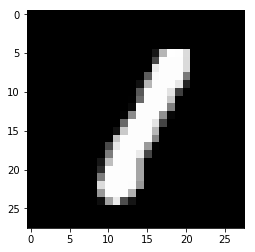

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


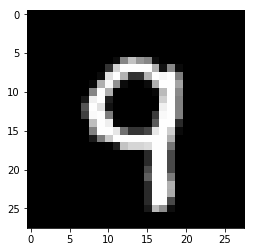

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


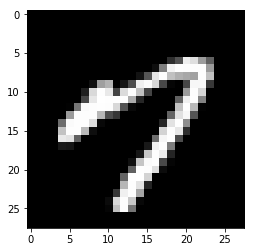

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


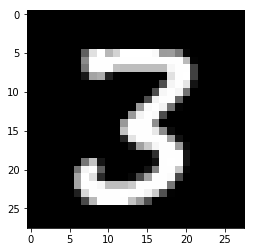

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


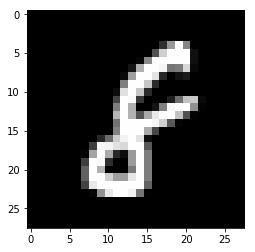

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


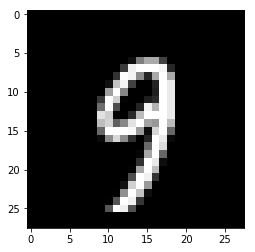

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


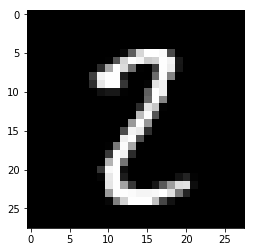

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


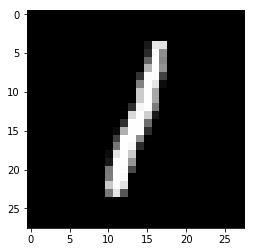

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


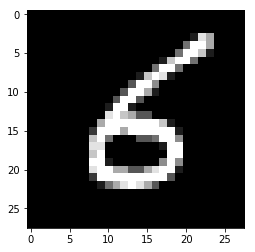

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


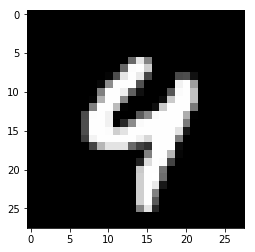

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


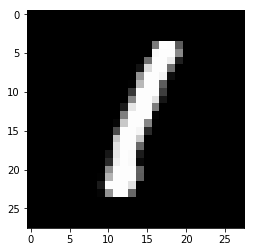

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


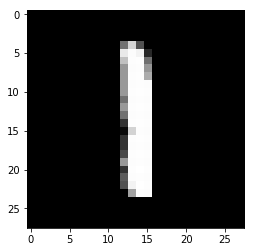

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


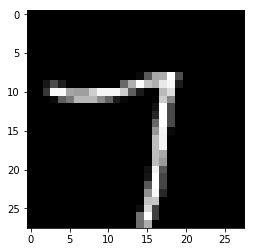

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


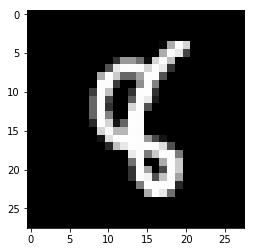

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


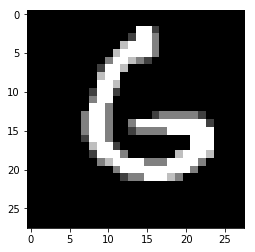

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


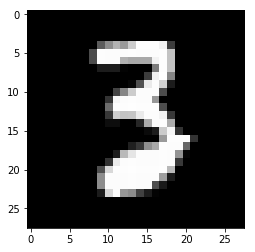

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


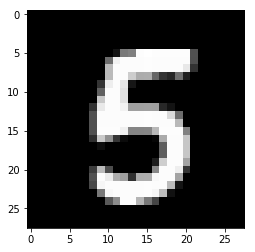

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


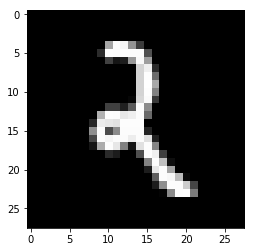

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


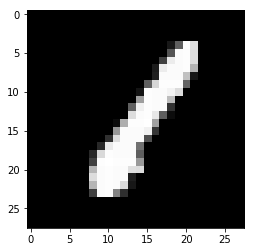

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


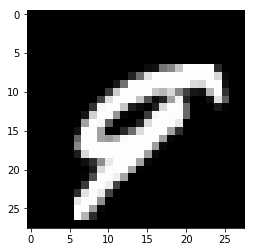

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


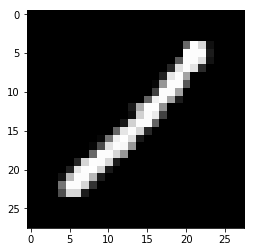

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


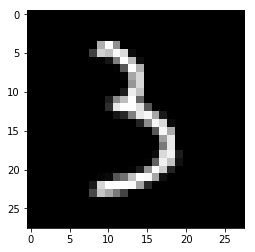

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


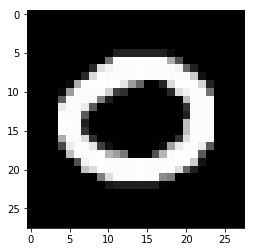

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


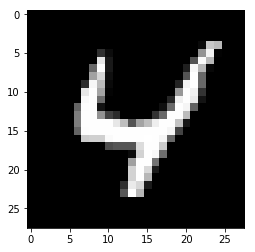

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


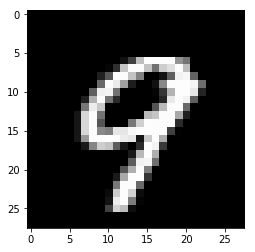

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


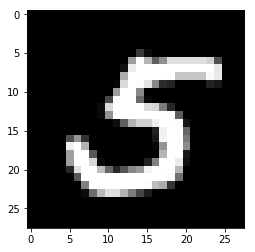

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


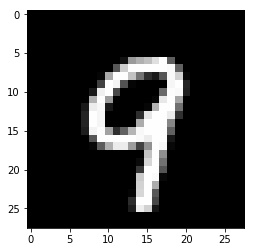

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


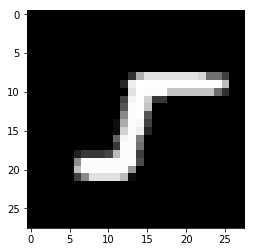

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


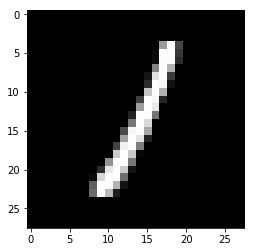

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


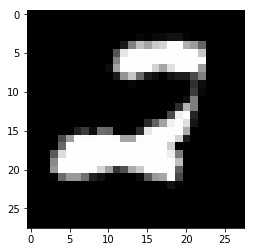

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


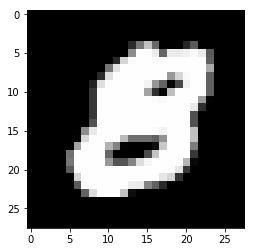

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


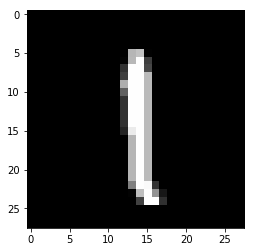

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


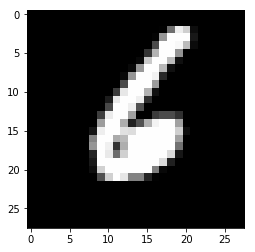

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


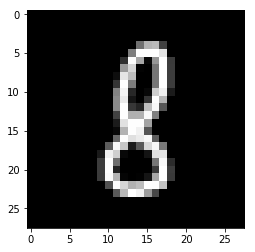

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


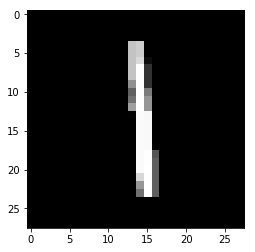

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


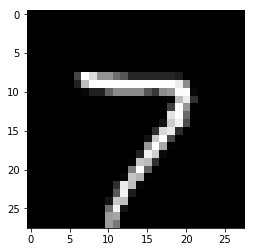

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


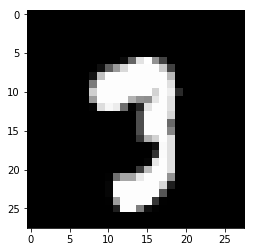

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


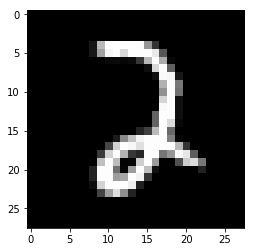

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


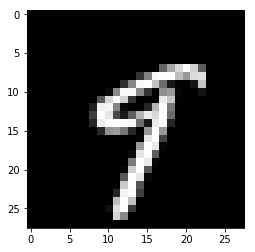

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


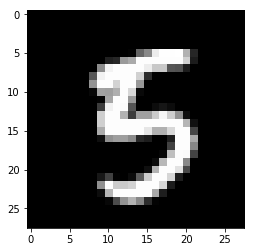

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


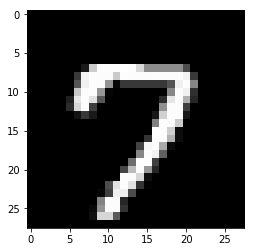

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


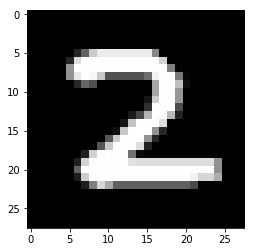

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


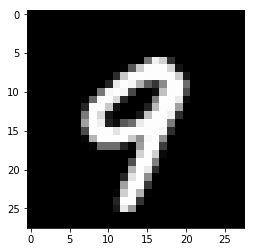

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


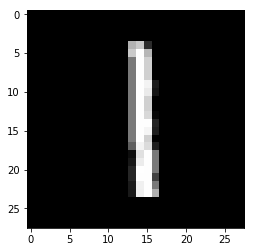

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


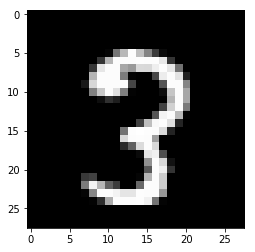

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


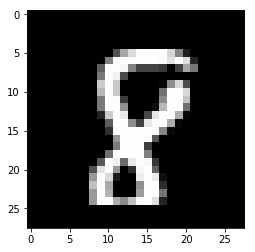

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


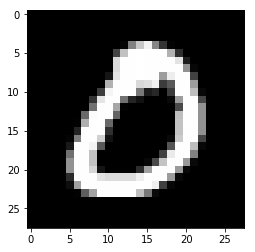

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


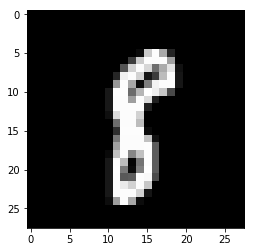

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


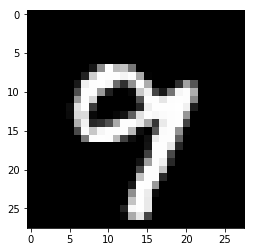

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


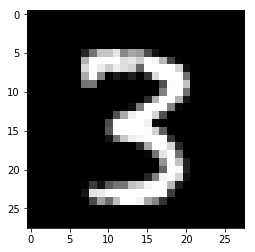

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


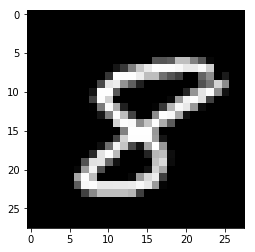

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


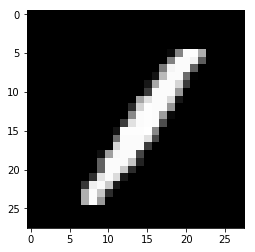

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


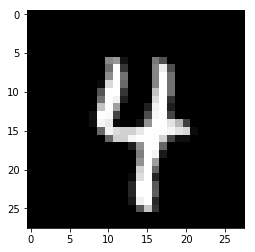

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


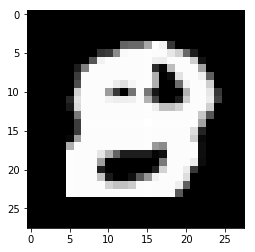

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


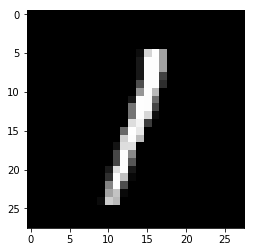

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


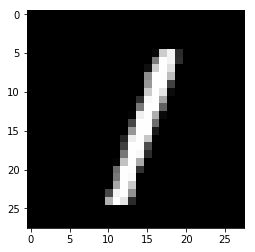

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


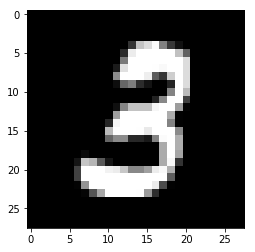

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


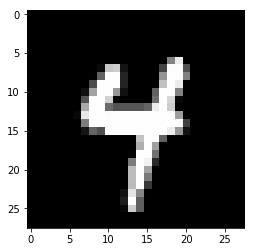

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


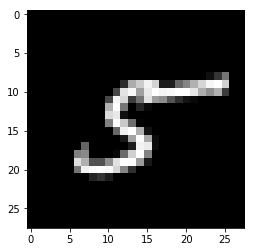

In [9]:
images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#shows all digit images and their label
for index, image in enumerate(images):
    print 'Label:', labels[index]
    print 'Digit in the image', np.argmax(labels[index])
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()


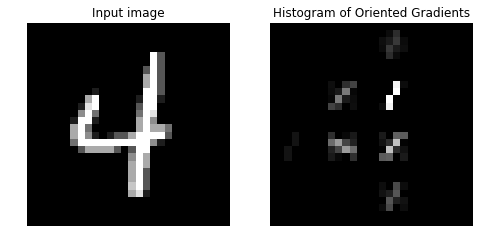

In [10]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

#turn images into images with hog features

fd, hog_image = hog(images[1].reshape(28,28), orientations=8, pixels_per_cell=(7, 7),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(images[1].reshape(28,28), cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 255))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


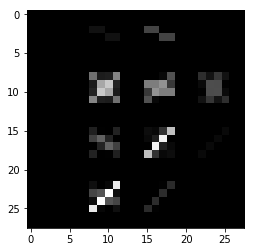

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


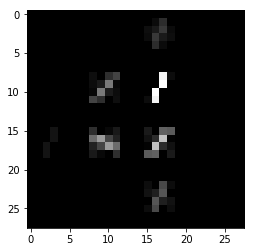

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


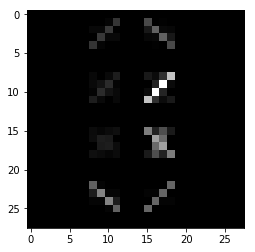

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


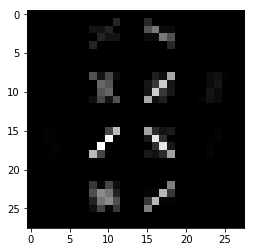

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


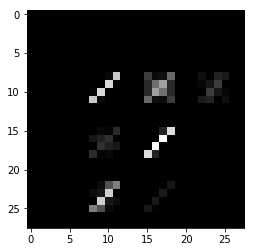

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


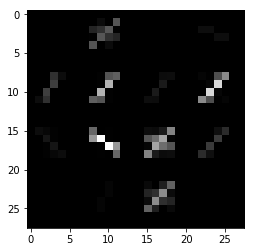

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


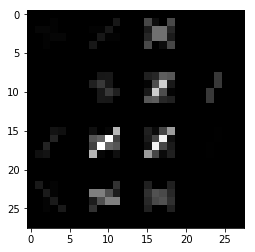

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


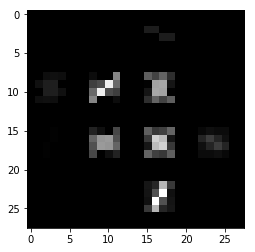

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


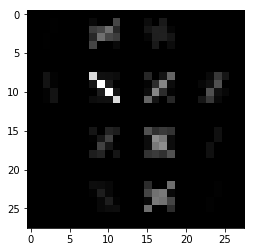

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


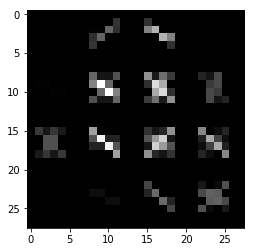

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


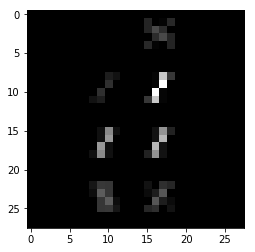

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


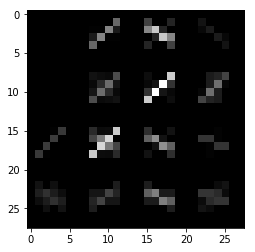

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


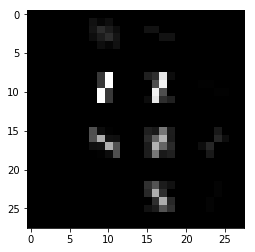

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


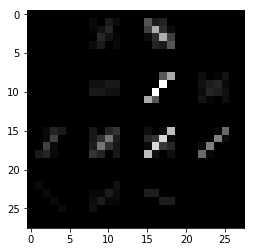

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


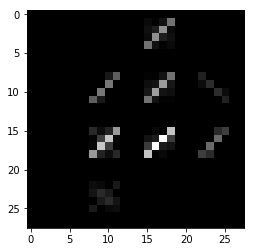

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


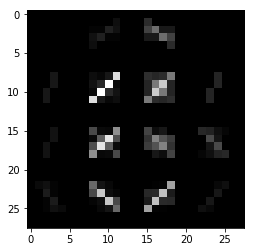

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


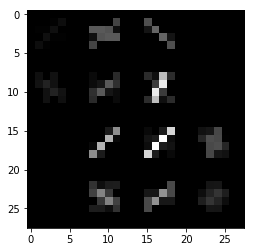

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


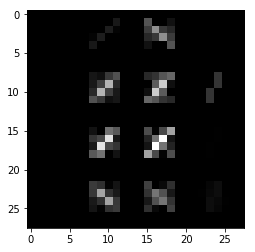

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


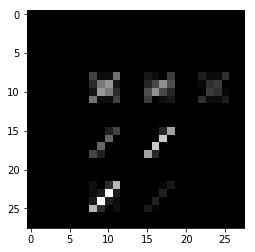

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


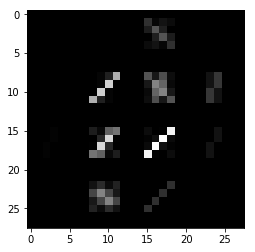

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


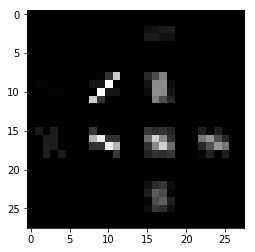

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


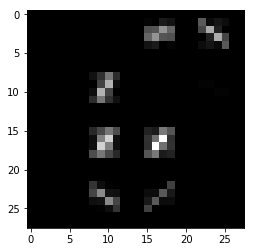

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


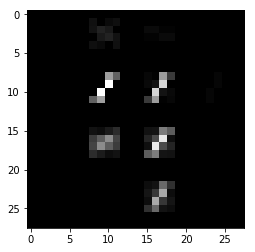

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


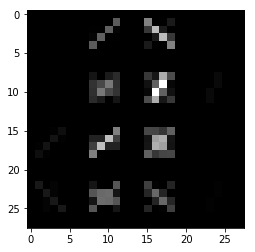

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


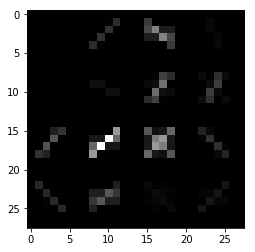

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


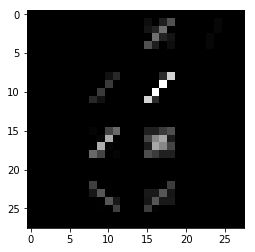

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


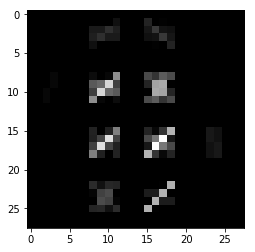

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


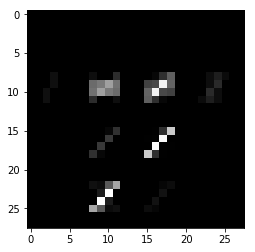

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


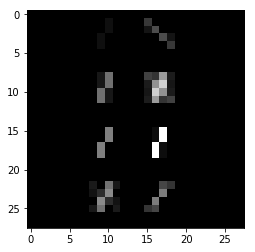

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


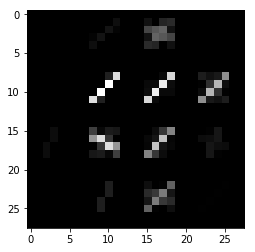

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


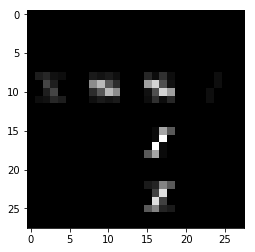

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


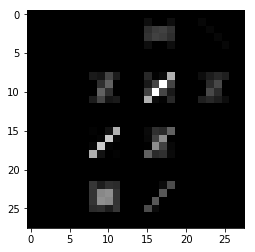

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


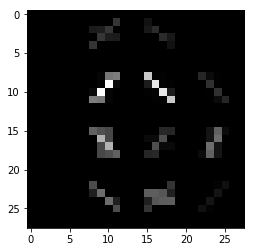

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


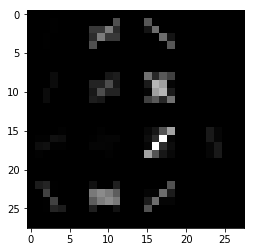

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


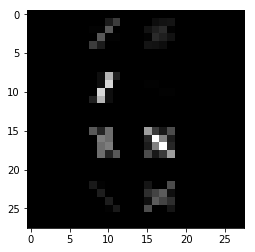

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


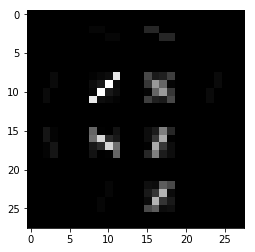

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


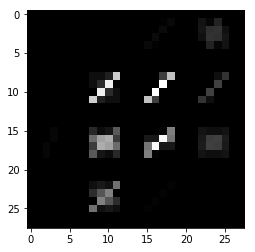

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


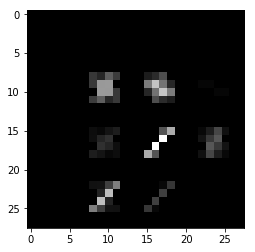

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


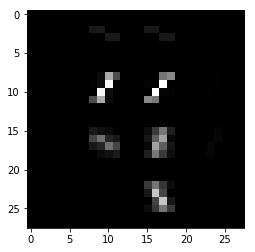

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


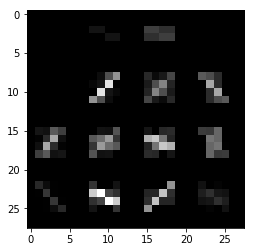

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


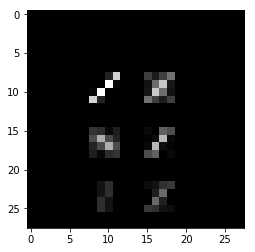

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


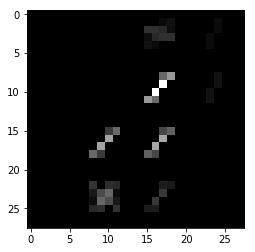

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


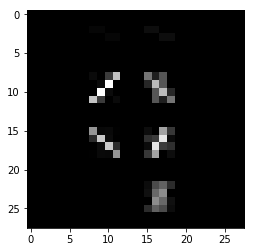

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


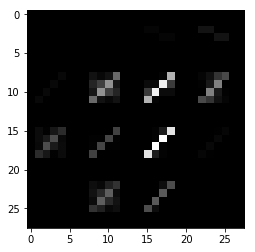

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


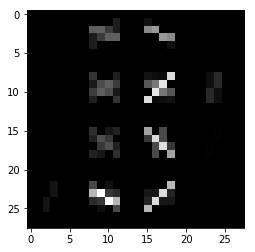

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


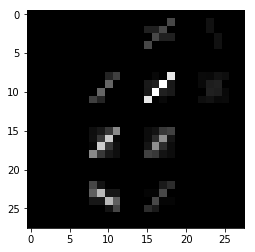

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


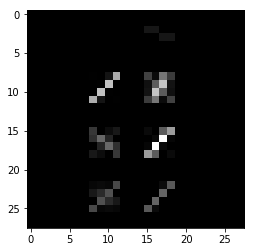

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


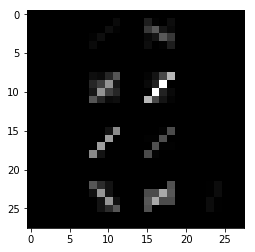

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


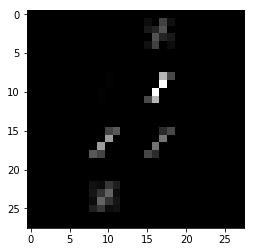

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


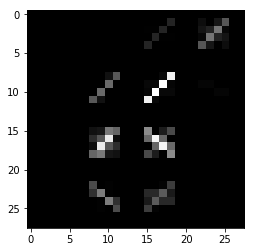

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


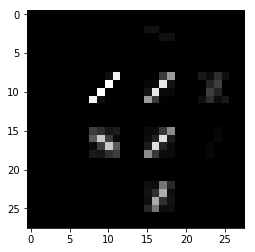

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


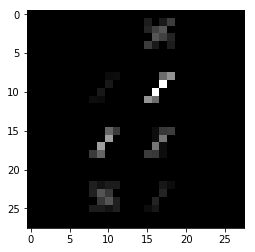

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


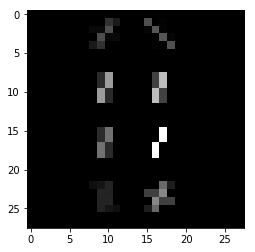

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


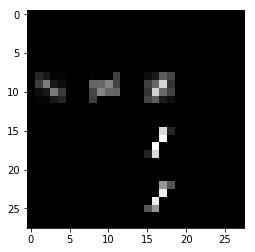

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


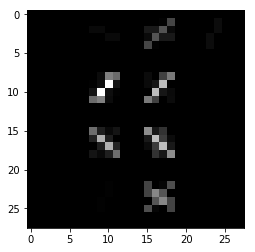

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


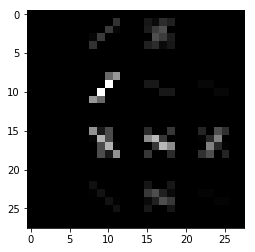

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


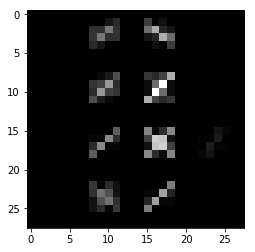

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


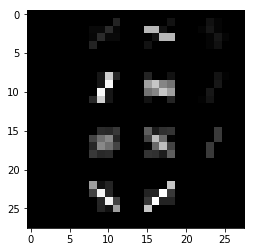

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


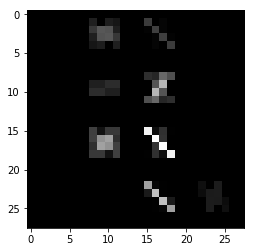

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


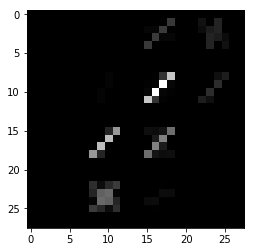

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


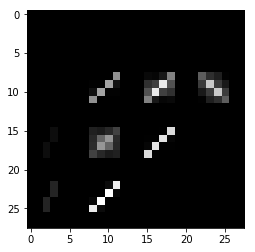

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


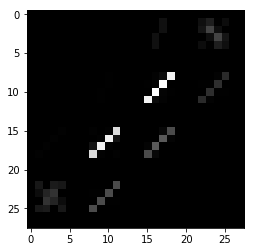

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


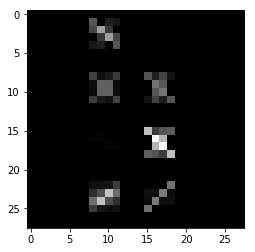

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


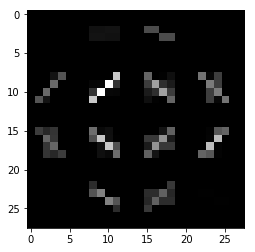

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


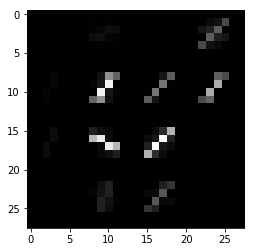

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


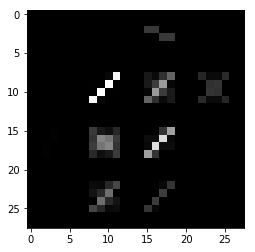

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


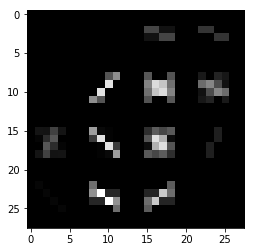

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


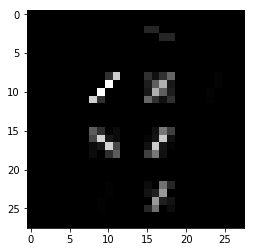

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


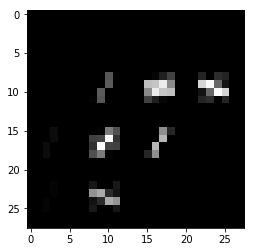

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


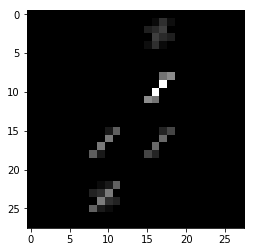

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


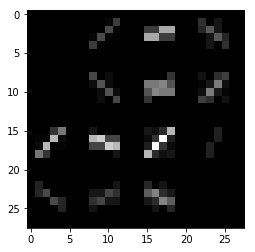

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


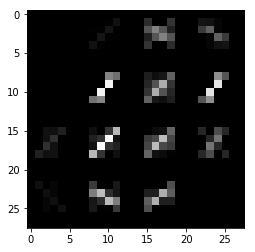

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


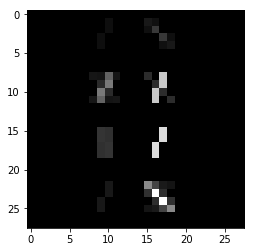

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


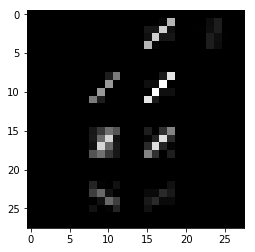

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


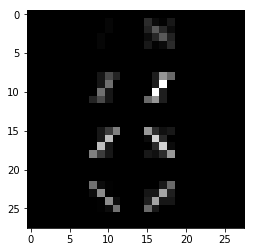

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


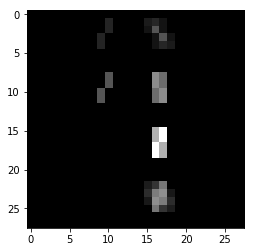

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


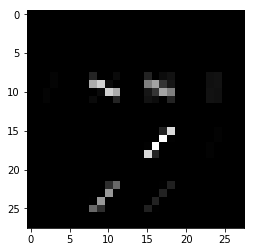

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


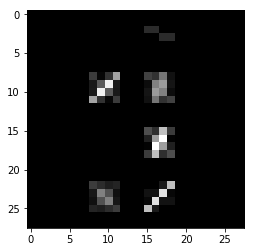

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


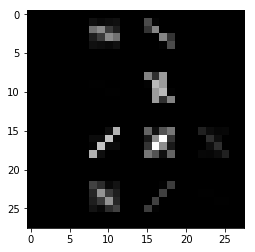

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


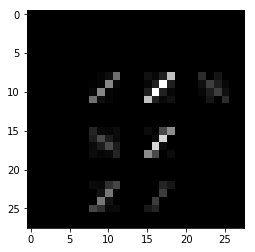

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


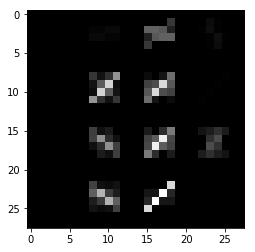

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


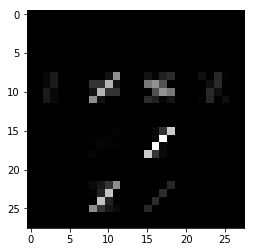

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


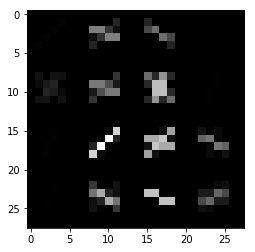

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


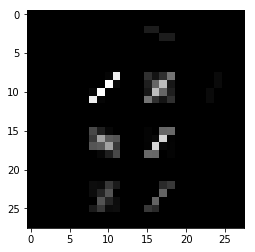

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


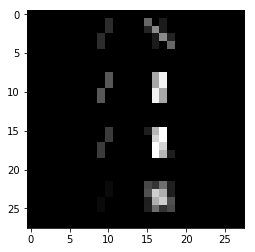

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


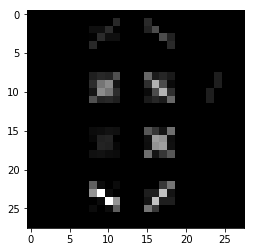

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


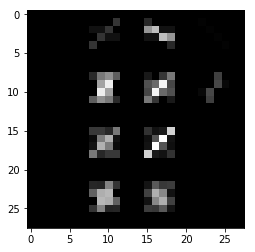

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


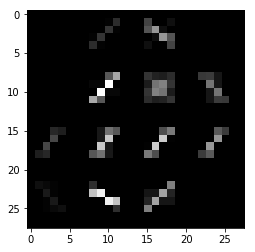

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


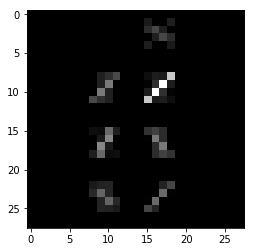

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


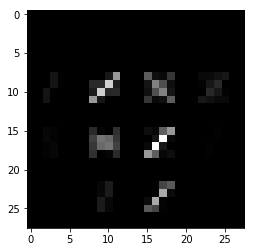

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


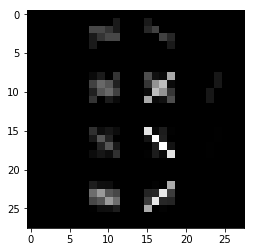

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


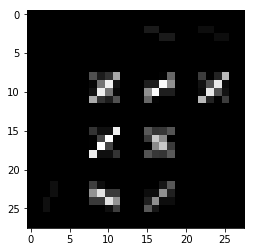

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


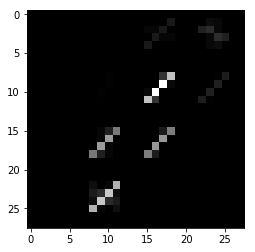

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


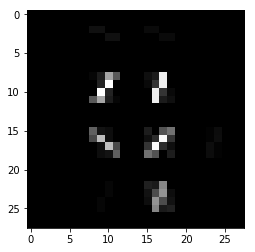

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


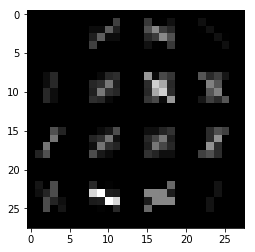

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


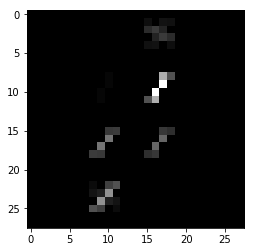

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


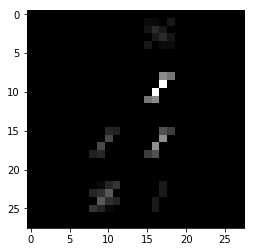

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


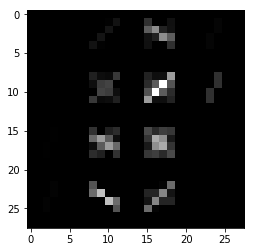

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


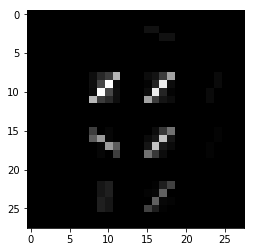

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


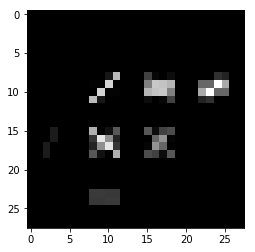

In [11]:
hog_images = []
hog_features = []
for i in range(image_count):
    fd,hog_image = hog(images[i].reshape(28,28), orientations=8, pixels_per_cell=(7,7),cells_per_block=(1, 1),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
    
    # print the new images
for index, image in enumerate(hog_images):
    print 'Label:', labels[index]
    print 'Digit in the image', np.argmax(labels[index])
    plt.imshow(image,cmap='gray')
    plt.show()

In [12]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

# user extracted hog features to train a SVM

#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)


x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

# get accuracy from training

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.75


              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        15
         1.0       0.00      0.00      0.00         5

   micro avg       0.75      0.75      0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



In this notebook we covered a very simple content: MNIST data set and how to use tensorflow API to fetch them. Hope this was helpful to focus on the algorithm part in the next notebook where we train a neural network for MNIST digit classification.